## Config

In [ ]:
### Better comments extension
# * This is a simple script to test the functionality of the better comments extension
# ! this is a warning comment
# ? this is a question comment
# TODO this is a todo comment
# // this is a strikethrough comment
# * this is a highlight comment

In [1]:
#// Import the required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## Data 

In [2]:
path_to_year = '/Users/tomaltenborg/Documents/Master/Master thesis/Notebooks/M-Competitions/M3-Competition/Year/M3_yearly_results.parquet'
path_to_quarter = '/Users/tomaltenborg/Documents/Master/Master thesis/Notebooks/M-Competitions/M3-Competition/Quarter/M3_quarter_results.parquet'
path_to_month = '/Users/tomaltenborg/Documents/Master/Master thesis/Notebooks/M-Competitions/M3-Competition/Month/M3_monthly_results.parquet'

df_year = pd.read_parquet(path_to_year)
df_quarter = pd.read_parquet(path_to_quarter)
df_month = pd.read_parquet(path_to_month)

df = pd.concat([df_year, df_quarter, df_month])
df = df.reset_index(drop=True)
df.sort_values(by = ['Series', 'ForecastPeriod', 'Method'], inplace = True)
df['Category'] = df['Category'].str.strip()

### Methods to include in plot

In [3]:
methods = ['ARARMA', 'Auto-ANN', 'AutoBox1', 'B-J auto',
 'COMB S-H-D', 'DAMPEN', 'Flors-Pearc1', 'ForcX', 'ForecastPro',
 'HOLT', 'NAIVE2', 'PP-Autocast', 'RBF', 'ROBUST-Trend', 'SINGLE', 'SMARTFCS',
 'THETA', 'TimeGPT', 'WINTER', 'AAM1']

## Yearly data

### sMAPE

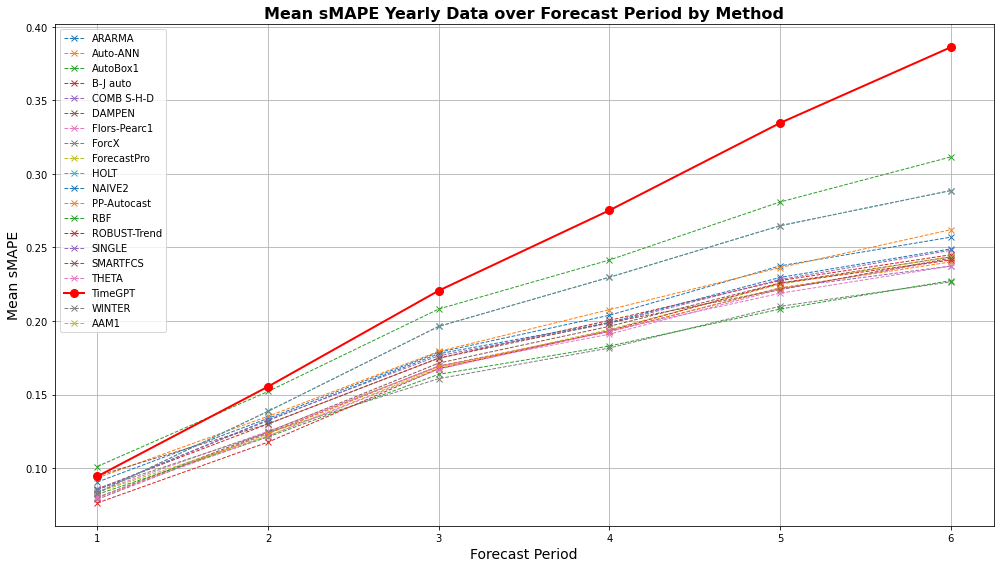

In [6]:
# Plot setup
plt.figure(figsize=(14, 8))
for method in methods:
    # Filter DataFrame for the current method
    method_df_year = df_year[df_year['Method'] == method]
    
    # Calculate mean of sMAPE per ForecastPeriod for the current method
    mean_sMAPE = method_df_year.groupby('ForecastPeriod')['sMAPE'].mean()
    
    # Plot each method with a specific marker and line style
    if method == 'TimeGPT':
        # Make TimeGPT easily distinguishable
        plt.plot(mean_sMAPE.index, mean_sMAPE.values, label=method, marker='o', linestyle='-', linewidth=2, markersize=8, color='red')
    else:
        # Other methods
        plt.plot(mean_sMAPE.index, mean_sMAPE.values, label=method, marker='x', linestyle='--', linewidth=1, markersize=6)

plt.title('Mean sMAPE Yearly Data over Forecast Period by Method', fontsize=16, fontweight='bold')
plt.xlabel('Forecast Period', fontsize=14)
plt.ylabel('Mean sMAPE', fontsize=14)
plt.legend()  # Show legend to identify methods
plt.grid(True)
plt.tight_layout()
plt.show()


## Quarterly Data 

### sMAPE

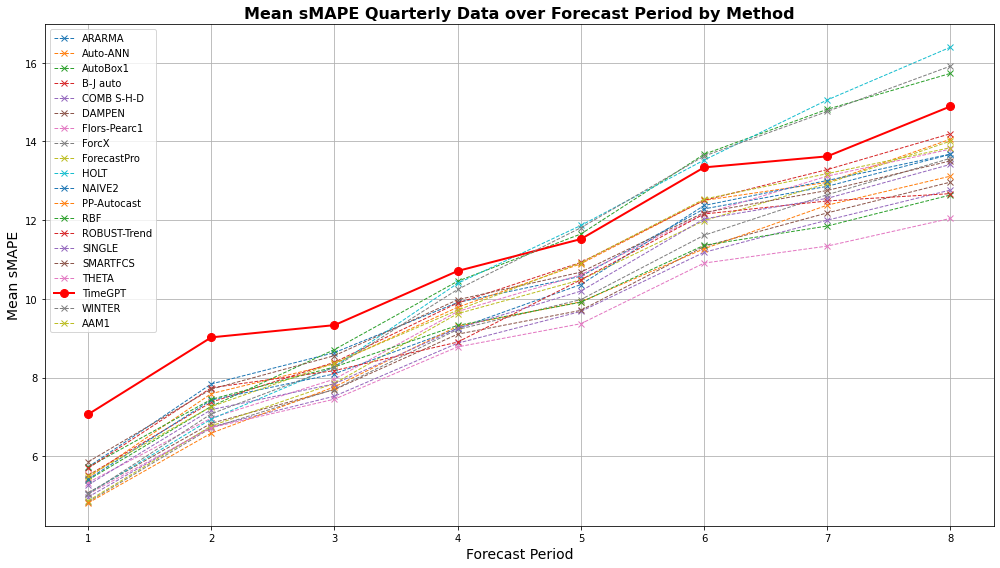

In [7]:
# Plot setup
plt.figure(figsize=(14, 8))
for method in methods:
    # Filter DataFrame for the current method
    method_dfdf_quarter =df_quarter[df_quarter['Method'] == method]
    
    # Calculate mean of sMAPE per ForecastPeriod for the current method
    mean_sMAPE = method_dfdf_quarter.groupby('ForecastPeriod')['sMAPE'].mean()
    
    # Plot each method with a specific marker and line style
    if method == 'TimeGPT':
        # Make TimeGPT easily distinguishable
        plt.plot(mean_sMAPE.index, mean_sMAPE.values, label=method, marker='o', linestyle='-', linewidth=2, markersize=8, color='red')
    else:
        # Other methods
        plt.plot(mean_sMAPE.index, mean_sMAPE.values, label=method, marker='x', linestyle='--', linewidth=1, markersize=6)

plt.title('Mean sMAPE Quarterly Data over Forecast Period by Method', fontsize=16, fontweight='bold')
plt.xlabel('Forecast Period', fontsize=14)
plt.ylabel('Mean sMAPE', fontsize=14)
plt.legend()  # Show legend to identify methods
plt.grid(True)
plt.tight_layout()
plt.show()


## Monthly Data

### sMAPE

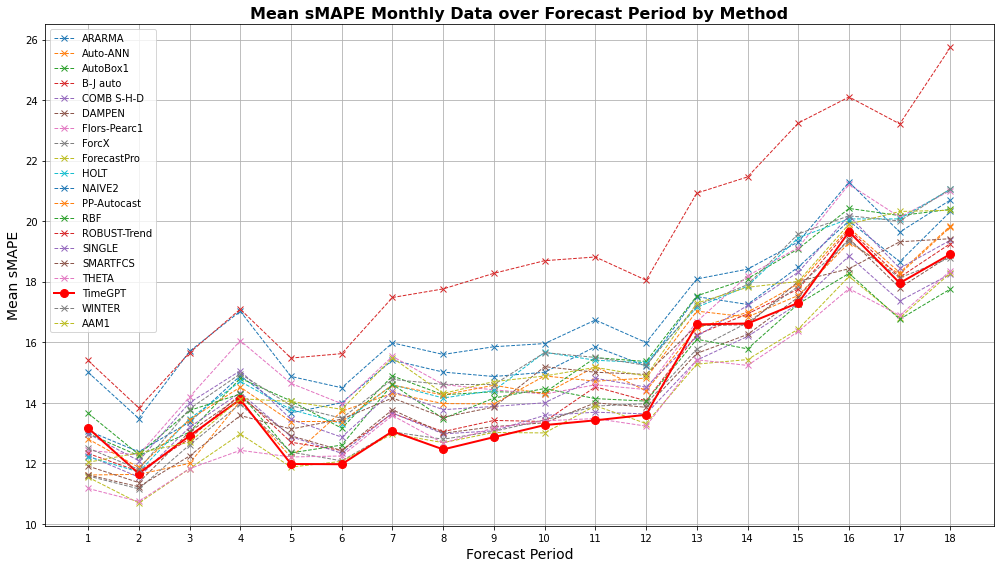

In [10]:
# Plot setup
plt.figure(figsize=(14, 8))
for method in methods:
    # Filter DataFrame for the current method
    method_df_df_month =df_month[df_month['Method'] == method]
    
    # Calculate mean of sMAPE per ForecastPeriod for the current method
    mean_sMAPE = method_df_df_month.groupby('ForecastPeriod')['sMAPE'].mean()
    
    # Plot each method with a specific marker and line style
    if method == 'TimeGPT':
        # Make TimeGPT easily distinguishable
        plt.plot(mean_sMAPE.index, mean_sMAPE.values, label=method, marker='o', linestyle='-', linewidth=2, markersize=8, color='red')
    else:
        # Other methods
        plt.plot(mean_sMAPE.index, mean_sMAPE.values, label=method, marker='x', linestyle='--', linewidth=1, markersize=6)

plt.xticks(range(1, 18+1), range(1, 18+1))  # Set x-axis ticks to go from 1 to 18
plt.title('Mean sMAPE Monthly Data over Forecast Period by Method', fontsize=16, fontweight='bold')
plt.xlabel('Forecast Period', fontsize=14)
plt.ylabel('Mean sMAPE', fontsize=14)
plt.legend()  # Show legend to identify methods
plt.grid(True)
plt.tight_layout()
plt.show()
